In [1]:
#: importing the libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Conv2D,GlobalAveragePooling2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Lambda,Input
from tensorflow.keras.optimizers import Adam
import warnings
import numpy as np
warnings.filterwarnings('ignore');

In [2]:
#: importing the pre trained model
inception_model=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3))
# weights='imagenet' because to load the pre traiend weights which are trained while training on the imagenet dataset

In [3]:
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [4]:
inception_model.output

<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'mixed10')>

In [5]:
#: training the last 15 layers and setting the base model layers parameters are frozzen
for layer in inception_model.layers[:-15]:
    layer.trainable=False

In [7]:
#: here we are adding the custom dense layers after the base model layers
x=inception_model.output
x=GlobalAveragePooling2D()(x)   #: we did the average polling on the output of the convolaution layer
x=Flatten()(x)
x=Dense(units=512,activation='relu')(x)
x=Dropout(.3)(x)
#: 30% of the neurons are chances to get deactivated during the training process
x=Dense(units=512,activation='relu')(x)
x=Dropout(.3)(x)
output=Dense(units=4,activation='softmax')(x)
model=Model(inception_model.input,output)   #:by setting the inception_model.input we are taking the pretraiend layers of the model, or say 
#: we are taking base model from the inception v3

In [8]:
#: rescale means to set the values between the 0-1, shear is a type of transformation, and the tilting the image horizontally
train_img=ImageDataGenerator(rescale=1/255,
                            shear_range=.2,
                            zoom_range=.2,
                            horizontal_flip=True)
#: not flip and shear for the test dataset
test_img=ImageDataGenerator(rescale=1/255)

In [14]:
#: creating the training and test dataset
training_set=train_img.flow_from_directory('./Data/train',
                             target_size=(224,224),
                             batch_size=32,
                             class_mode='categorical')
test_set=train_img.flow_from_directory('./Data/test',
                             target_size=(224,224),
                             batch_size=32,
                             class_mode='categorical')
validation_dataset=test_img.flow_from_directory("./Data/valid",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [15]:
#: compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Choose the learning rate
    loss='categorical_crossentropy',  # Use appropriate loss function, for multi class classification the loss function is categorical cross entropy
    metrics=['accuracy']  # Monitor model accuracy
)

In [16]:
r = model.fit_generator(
  training_set,
  validation_data=validation_dataset,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_dataset)
)

Epoch 1/15
20/20 [==============================] - 26s 1s/step - loss: 0.9946 - accuracy: 0.5856 - val_loss: 0.9857 - val_accuracy: 0.4306
Epoch 2/15
20/20 [==============================] - 26s 1s/step - loss: 0.9409 - accuracy: 0.5791 - val_loss: 0.9262 - val_accuracy: 0.4861
Epoch 3/15
20/20 [==============================] - 19s 918ms/step - loss: 0.8033 - accuracy: 0.6542 - val_loss: 0.9099 - val_accuracy: 0.5000
Epoch 4/15
20/20 [==============================] - 39s 2s/step - loss: 0.7665 - accuracy: 0.6656 - val_loss: 0.8572 - val_accuracy: 0.5556
Epoch 5/15
20/20 [==============================] - 20s 1s/step - loss: 0.7078 - accuracy: 0.6884 - val_loss: 0.8392 - val_accuracy: 0.5556
Epoch 6/15
20/20 [==============================] - 22s 1s/step - loss: 0.6859 - accuracy: 0.7129 - val_loss: 0.8049 - val_accuracy: 0.5556
Epoch 7/15
20/20 [==============================] - 27s 1s/step - loss: 0.6305 - accuracy: 0.7423 - val_loss: 0.8058 - val_accuracy: 0.5972
Epoch 8/15
20/20 

Text(0.5, 1.0, 'Train Loss Vs Validation Loss')

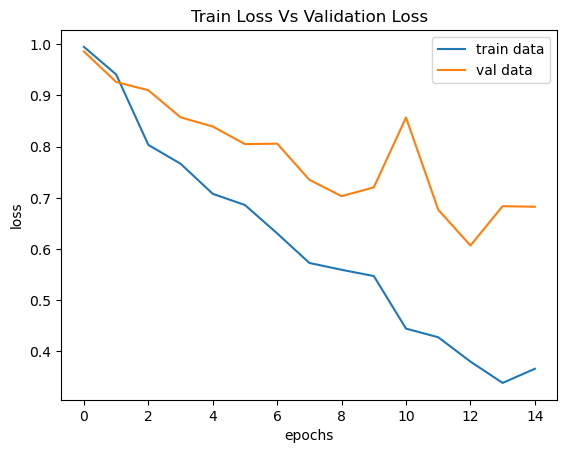

In [30]:
#: plotting the val accuracy and accuracy
#: plotting the val loss and loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['train data','val data'])
plt.xlabel('epochs');
plt.ylabel('loss');
plt.title('Train Loss Vs Validation Loss');

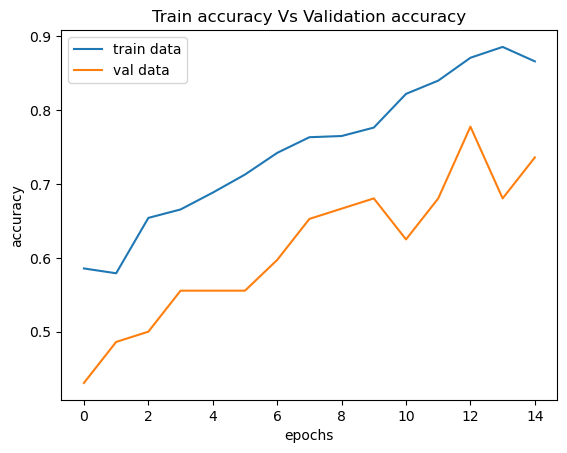

In [32]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['train data','val data'])
plt.xlabel('epochs');
plt.ylabel('accuracy');
plt.title('Train accuracy Vs Validation accuracy');

In [17]:
#: validate the model
predications=model.predict(test_set)

10/10 [==============================] - 10s 837ms/step


In [87]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma "]

In [33]:
predicted_classes=np.argmax(predications,axis=1)
predicted_classes

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 0, 1, 3, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 3, 1, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 0,
       2, 0, 1, 2, 1, 2, 0, 0, 3, 0, 2, 0, 1, 0, 0, 1, 0, 3, 3, 3, 0, 0,
       3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 3, 0, 0, 0, 3, 3, 0, 2,
       3, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 0, 0, 1, 0, 2, 0, 3, 0, 3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2,
       3, 0, 0, 3, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 3, 3, 0, 3, 3, 3, 1, 2,
       1, 0, 3, 2, 2, 0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 3, 2, 0, 1, 2, 3, 2,
       1, 0, 3, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 3, 2, 0, 3, 3, 0, 1, 0, 0,
       1, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 0, 0, 2, 2, 0, 1, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 1, 0, 1, 3, 0, 2, 2, 2, 0, 3, 3, 2, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 1, 1, 3,
       0, 3, 2, 3, 0, 3, 0, 0, 3, 2, 3, 2, 0, 3, 2, 0, 0, 2, 0, 0, 3, 3,
       0, 1, 3, 0, 0, 2, 3, 0, 3, 2, 1, 0, 2, 0, 0,

In [40]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell"]
def show_result(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    print(classes[np.argmax(model.predict(x))])

In [35]:
#: saving the model
model.save('Cancer-Detection.h5')


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 47ms/step
AdenocarcinomaChest Lung Cancer 


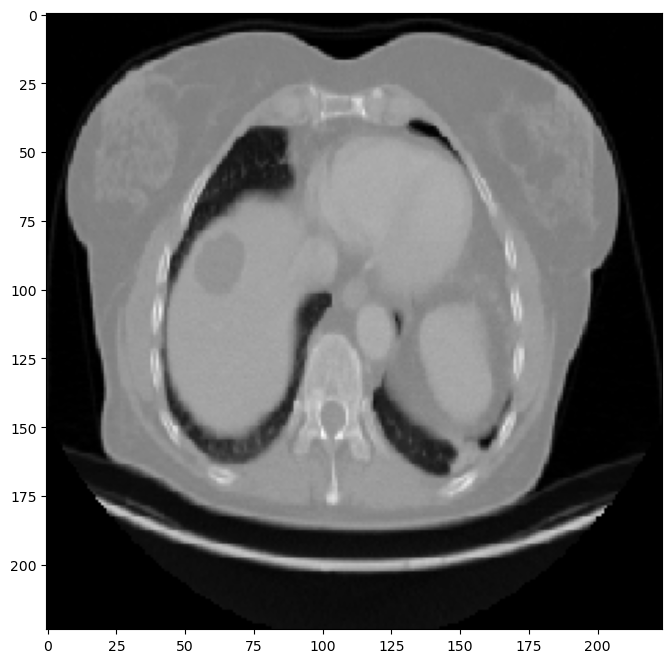

In [41]:
img=image.load_img('./Data/test/adenocarcinoma/000117.png',target_size=(224,224))
show_result(img)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 41ms/step
AdenocarcinomaChest Lung Cancer 


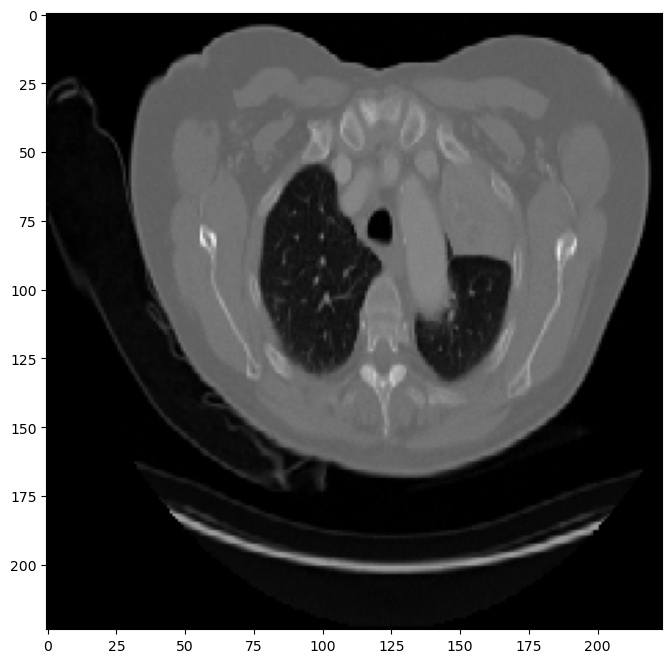

In [42]:
img=image.load_img('./Data/test/adenocarcinoma/000125 (4).png',target_size=(224,224))
show_result(img)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 47ms/step
NO Lung Cancer/ NORMAL


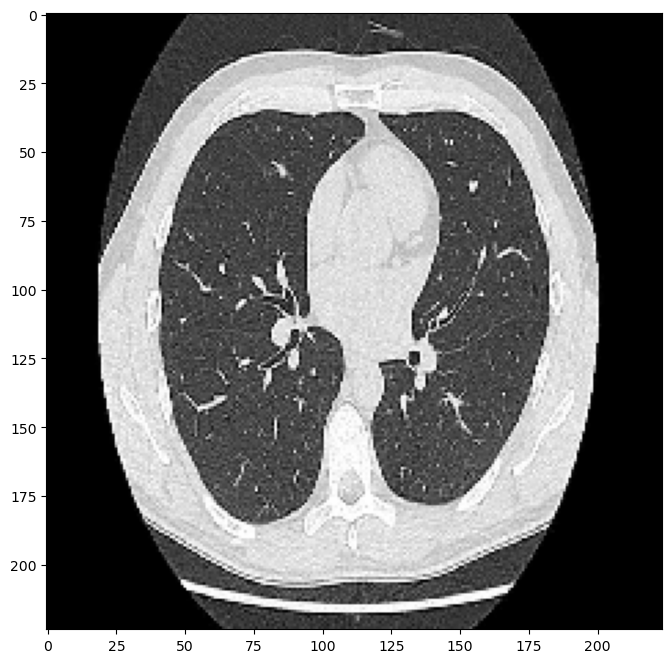

In [43]:
img=image.load_img('./Data/test/normal/7 (2) - Copy.png',target_size=(224,224))
show_result(img)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 47ms/step
AdenocarcinomaChest Lung Cancer 


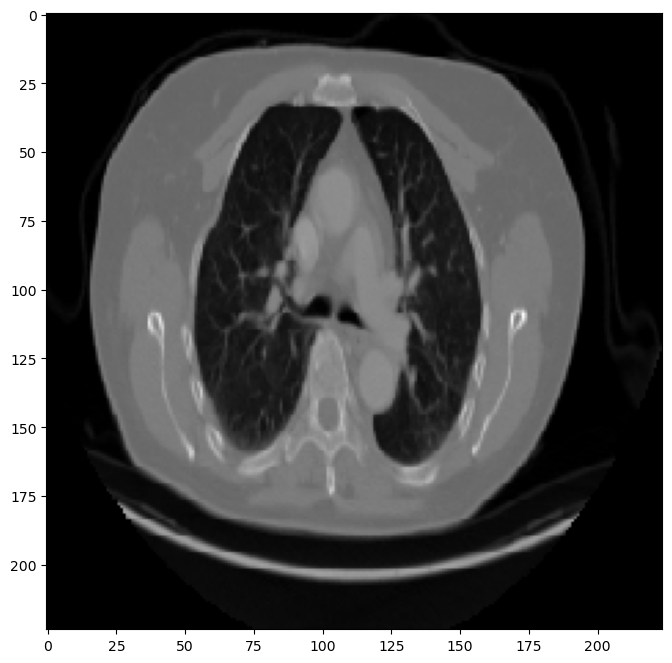

In [44]:
img=image.load_img('./Data/test/adenocarcinoma/000114.png',target_size=(224,224))
show_result(img)